Assignment 7
1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

7. Isolate all the categorical column names into a list named ‘categorical’.

8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import seaborn as sns, warnings
warnings.filterwarnings('ignore')

Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

In [85]:
ins= pd.read_csv("insurance.csv")

Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

In [86]:
print(ins.shape)

(1338, 7)


In [87]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [88]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Considering the target column is continous in nature, a regression approach is requred in conducting predictive analysis on the data.

Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

In [91]:
age_range = []
for age in range (10,70,10):
    age_range.append('{0} - {1}'.format(age, age + 9.0))

ins['age_range'] = pd.cut(x = ins['age'], bins = 6, labels = age_range)
ins

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50 - 59.0
1334,18,female,31.920,0,no,northeast,2205.98080,10 - 19.0
1335,18,female,36.850,0,no,southeast,1629.83350,10 - 19.0
1336,21,female,25.800,0,no,southwest,2007.94500,10 - 19.0


In [92]:
age_range_hist = ins['age_range']
age_hist = pd.DataFrame(age_range_hist).value_counts().reset_index()
age_hist.columns = ['age_range','count']
age_hist

,age_range,count
0,10 - 19.0,306
1,50 - 59.0,223
2,20 - 29.0,217
3,30 - 39.0,205
4,40 - 49.0,197
5,60 - 69.0,190


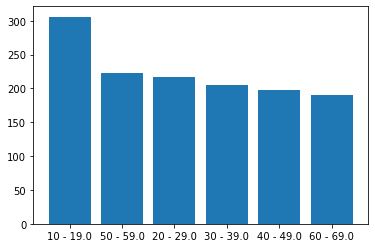

In [93]:
plt.bar(age_hist['age_range'], age_hist['count'])
plt.show()

the data contained a majority of individuals between the age 10-19 followed by those between 50-59 and the least were btween 60 and 69

Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

In [94]:
numerical_continuous = []
for column in ins.columns:
    if ins[column].dtypes != 'object':
        if ins[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove('charges')
numerical_continuous

['age', 'bmi']

In [95]:
numerical_discrete = []
for column in ins.columns:
    if ins[column].dtypes != 'object':
        if ins[column].nunique() < 10:
            numerical_discrete.append(column)
numerical_discrete

['children', 'age_range']

Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

<AxesSubplot:>

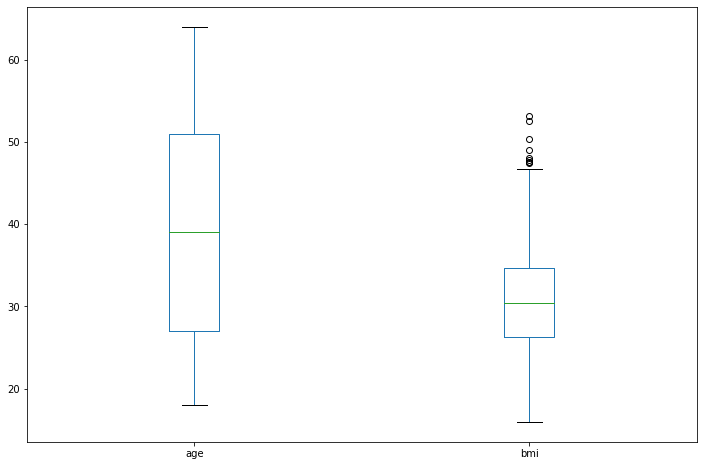

In [96]:
ins[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method

In [97]:
ins = ins.drop_duplicates()
ins

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50 - 59.0
1334,18,female,31.920,0,no,northeast,2205.98080,10 - 19.0
1335,18,female,36.850,0,no,southeast,1629.83350,10 - 19.0
1336,21,female,25.800,0,no,southwest,2007.94500,10 - 19.0


<AxesSubplot:>

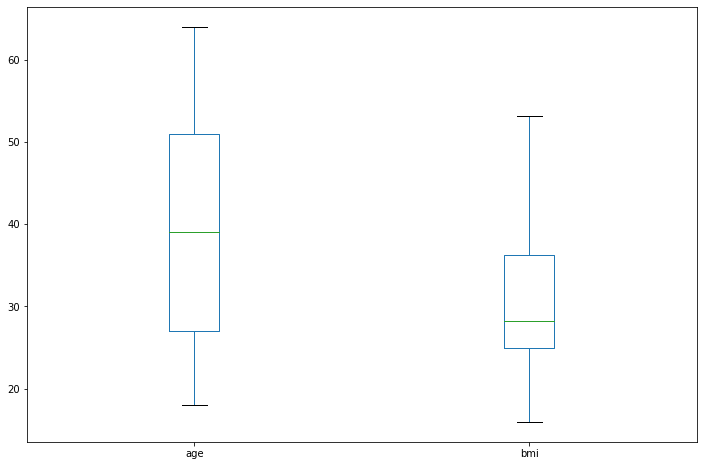

In [98]:
from scipy import stats
threshold = 0.3705
zscore = np.abs(stats.zscore(ins[['bmi']]))
ins[(zscore > threshold).all(axis=1)][numerical_continuous].plot(kind = 'box', figsize = (12, 8))

Isolate all the categorical column names into a list named ‘categorical’.

In [99]:
ins= ins[(zscore > threshold).all(axis = 1)]

In [100]:
categorical = []
for column in ins.columns:
    if ins[column].dtypes == 'object':
        categorical.append(column)
categorical

['sex', 'smoker', 'region']

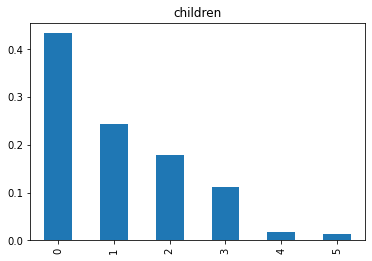

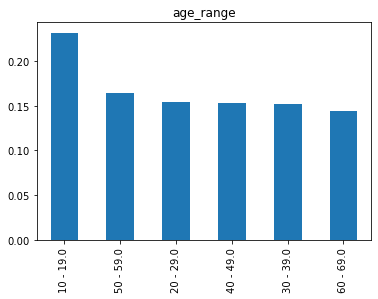

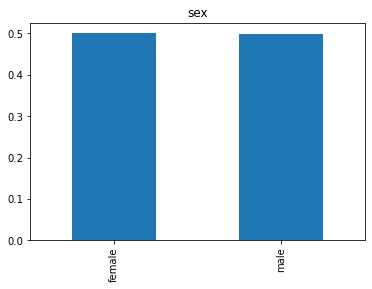

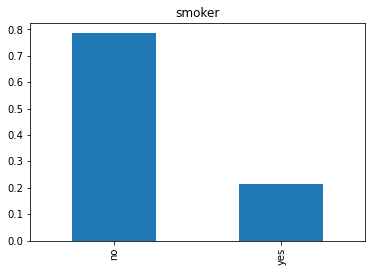

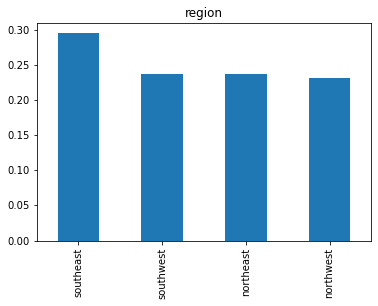

In [101]:
import matplotlib.pyplot as plt
for column in numerical_discrete + categorical:
    (ins[column].value_counts()/ins[column].shape[0]).plot(kind = 'bar')
    plt.title(column)
    plt.show()

Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

In [102]:
ins['children'] = ins['children'].replace([3, 4, 5], 'Rare')

Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [103]:
#mode
#mean
#median

encoded_features = {}
for column in numerical_discrete + categorical:
    encoded_features[column] = ins.groupby([column])['charges'].median().to_dict()
    ins[column] = ins[column].map(encoded_features[column])

In [104]:
encoded_features

{'children': {0: 9644.2525, 1: 8539.671, 2: 9954.0544, 'Rare': 10977.2063},
 'age_range': {'10 - 19.0': 2585.269,
  '20 - 29.0': 4719.6303,
  '30 - 39.0': 6646.536825,
  '40 - 49.0': 8891.1395,
  '50 - 59.0': 11082.5772,
  '60 - 69.0': 13543.6093},
 'sex': {'female': 9639.395250000001, 'male': 9391.346},
 'smoker': {'no': 7345.4053, 'yes': 29330.98315},
 'region': {'northeast': 9661.16525,
  'northwest': 9301.89355,
  'southeast': 9768.88825,
  'southwest': 9328.071499999998}}

Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [105]:
X = ins.drop('charges', axis = 1)
y = ins['charges']
X

,age,sex,bmi,children,smoker,region,age_range
0,19,9639.39525,27.900,9644.2525,29330.98315,9328.07150,2585.2690
1,18,9391.34600,33.770,8539.6710,7345.40530,9768.88825,2585.2690
2,28,9391.34600,33.000,10977.2063,7345.40530,9768.88825,4719.6303
3,33,9391.34600,22.705,9644.2525,7345.40530,9301.89355,4719.6303
5,31,9639.39525,25.740,9644.2525,7345.40530,9768.88825,4719.6303
...,...,...,...,...,...,...,...
1330,57,9639.39525,25.740,9954.0544,7345.40530,9768.88825,13543.6093
1331,23,9639.39525,33.400,9644.2525,7345.40530,9328.07150,2585.2690
1332,52,9639.39525,44.700,10977.2063,7345.40530,9328.07150,11082.5772
1335,18,9639.39525,36.850,9644.2525,7345.40530,9768.88825,2585.2690


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 5)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age           True
sex           True
bmi           True
children     False
smoker        True
region        True
age_range    False
dtype: bool


The column children had to be dropped according to the RFE. This could have been as a result of the combined rare levels analysis that could have compromised the integrity of the feature.

ADS Assignment 8.
This is a continuation of the analysis done from assignment 7. Based on the feature columns
identified, use them in your prediction analysis. You are advised to confirm back to the notes as
well as make good use of the Scikit-Learn documentation.
1. Convert the target labels to their respective log values and give 2 reasons why this step
may be useful as we train the machine learning model. (Explain in a markdown cell.)
2. Slice the selected feature columns and the labels into the training and testing set. Also
ensure your features are normalized.
3. Use at least 4 different regression based machine learning methods and use the training
and testing cross accuracy and divergence to identify the best model.
4. After identifying the best model, train it with the training data again. Using at least 3
model evaluation metrics in regression, evaluate the models training and testing score.
Also ensure as you test the models, the predicted and actual targets have been converted
back to the original values using antilog. (Hint: Antilog function is equal to Exponential)

In [107]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
l=np.log(y)
transformer.transform(y)

0       9.734236
1       7.453882
2       8.400763
3       9.998137
5       8.231541
          ...   
1330    9.443843
1331    9.287018
1332    9.342481
1335    7.396847
1336    7.605365
Name: charges, Length: 971, dtype: float64

1. Log transformation is important because it reduces skewness in the target column
2. The target variables show higher differences in their values

In [108]:
from sklearn.model_selection import train_test_split
X = ins.drop( "charges", axis=1)
y = ins[ "charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((728, 7), (243, 7), (728,), (243,))

In [109]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm= norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ 2.90215597e+02, -3.89520988e-01,  3.18383313e+02,  3.34922116e-01,
        1.04341634e+00, -7.95893227e-01, -1.10854519e-01])

In [112]:
lr.intercept_

-11503.153834373787

In [113]:
lr.score(X_train, y_train)

0.6363486703467414

In [114]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(ins.drop("charges", axis=1), ins["charges"])

Wall time: 400 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [115]:
model.score(ins.drop("charges", axis=1), ins["charges"])

0.9765697521629403

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = ins.drop("charges", axis=1)
y = ins["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
model.score(X_test, y_test)

0.8322033327467107

In [118]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data

X = ins.drop("charges", axis=1)
y = ins["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.7139715939278768

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = ins.drop("charges", axis=1)
y = ins["charges"]

clf = RandomForestClassifier(n_estimators=100)

In [120]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.std(cv_acc)*100:.2f}%")

The cross-validated accuracy is: nan%


In [121]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.std(cv_precision):.2f}")

The cross-validated precision is: nan


In [141]:
y = np.exp(l)
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
5        3756.62160
           ...     
1330    12629.16560
1331    10795.93733
1332    11411.68500
1335     1629.83350
1336     2007.94500
Name: charges, Length: 971, dtype: float64

In [142]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = ins.drop("charges", axis=1)
y = ins["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [143]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8322033327467107

In [144]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [145]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2896.3978029800005

In [146]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df.head(7)

,actual values,predictions
231,14001.28670,16503.714750
1165,5227.98875,5080.061311
93,5729.00530,5744.709114
85,21098.55405,29885.735755
113,2404.73380,2204.861454
913,7626.99300,9306.850684
1243,3171.61490,4493.408723


In [147]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

26420799.95279053